In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
df = pd.read_csv('https://raw.githubusercontent.com/dipalira/Melbourne-Housing-Data-Kaggle/master/Data/Melbourne_housing_FULL.csv')

In [47]:
df.shape

(34857, 21)

In [48]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [49]:
df.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

In [53]:
df = df.dropna(subset='Price')

In [55]:
df.shape

(27247, 21)

In [57]:
df['Price'] = df['Price'].astype(int)

In [58]:
df.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price              int64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

In [61]:
df['Type'].value_counts(normalize=True)

Type
h    0.677946
u    0.216868
t    0.105186
Name: proportion, dtype: float64

In [62]:
frequency_table = df['Type'].value_counts()

C:\Users\Pilar\AppData\Local\Temp\ipykernel_2184\3628697404.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frequency_table.index, y=frequency_table.values, palette="Set3");


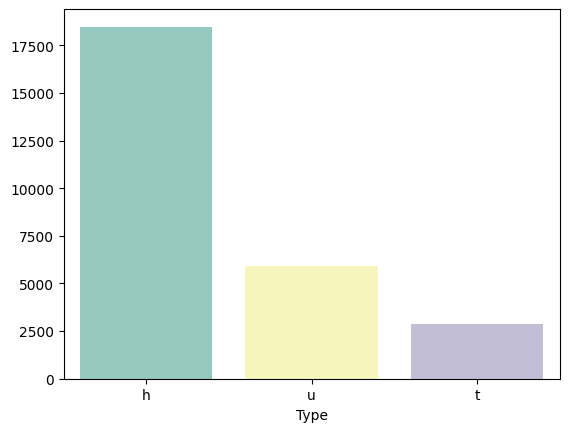

In [63]:
sns.barplot(x=frequency_table.index, y=frequency_table.values, palette="Set3");

In [64]:
crosstab_result = pd.crosstab(df['Price'], df['Rooms'])

crosstab_result

Rooms,1,2,3,4,5,6,7,8,9,10,12,16
Price,,,,,,,,,,,,
85000,1,0,0,0,0,0,0,0,0,0,0,0
112000,1,0,0,0,0,0,0,0,0,0,0,0
121000,1,0,0,0,0,0,0,0,0,0,0,0
131000,0,0,0,1,0,0,0,0,0,0,0,0
145000,1,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7000000,0,0,0,1,0,0,0,0,0,0,0,0
7650000,0,0,0,1,0,0,0,0,0,0,0,0
8000000,0,0,0,0,1,0,0,0,0,0,0,0


<Axes: xlabel='Rooms', ylabel='count'>

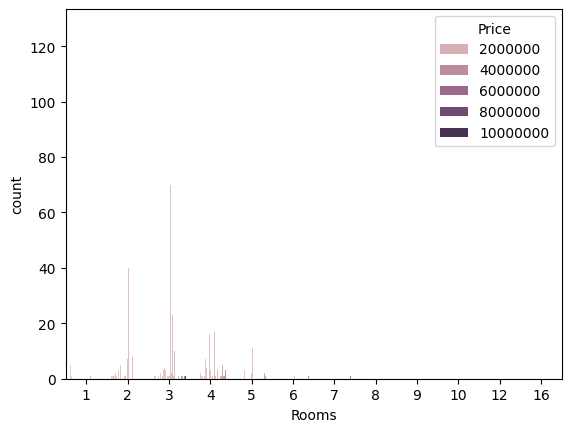

In [65]:
sns.countplot(data=df, x='Rooms', hue='Price')

In [70]:
df.groupby('Rooms').median('Price')

,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
Rooms,,,,,,,,,,,,
1,390000.0,5.20,3121.0,1.0,1.0,1.0,0.0,49.00,1970.0,-37.824500,144.990200,7822.0
2,678000.0,7.50,3081.0,2.0,1.0,1.0,164.0,85.00,1970.0,-37.810600,144.993030,6938.0
3,900000.0,11.20,3081.0,3.0,1.0,2.0,529.0,130.00,1970.0,-37.792300,145.000300,6482.0
4,1205250.0,12.30,3105.0,4.0,2.0,2.0,612.0,190.00,1973.0,-37.798100,145.030740,6232.0
5,1550000.0,11.40,3108.0,5.0,3.0,2.0,680.5,258.00,1975.0,-37.811290,145.058565,6567.0
6,1660000.0,12.10,3109.0,6.0,3.0,2.0,753.0,294.00,1972.0,-37.807055,145.047010,6232.0
7,1350000.0,10.45,3102.5,7.0,3.0,2.5,645.5,382.27,1985.0,-37.792300,145.053870,6575.5
8,1535883.0,10.45,3091.0,8.0,3.5,4.0,791.0,115.00,1960.0,-37.838500,145.033100,5459.0
9,1380000.0,14.70,3167.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3692.0


In [71]:
correlation = df['Price'].corr(df['Rooms'], method='spearman')
correlation

np.float64(0.5042971590926004)

<Axes: xlabel='Distance', ylabel='Price'>

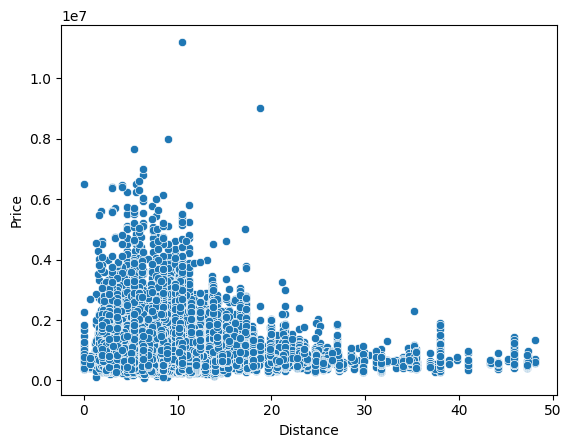

In [72]:
sns.scatterplot(data=df, x='Distance', y='Price')

In [73]:
correlation = df['Price'].corr(df['Distance'])
correlation

np.float64(-0.21138434279158289)

In [74]:
correlation = df['Price'].corr(df['Landsize'])
correlation

np.float64(0.03274836524947049)

In [75]:
def tukeys_test_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    
    # Define bounds for the outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify the outliers
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    
    return outliers


135      2850000
142      2300000
146      2485000
152      2615000
158      2575000
          ...   
34619    2300000
34623    2610000
34632    2500000
34714    2855000
34719    2685000
Name: Price, Length: 1278, dtype: int64


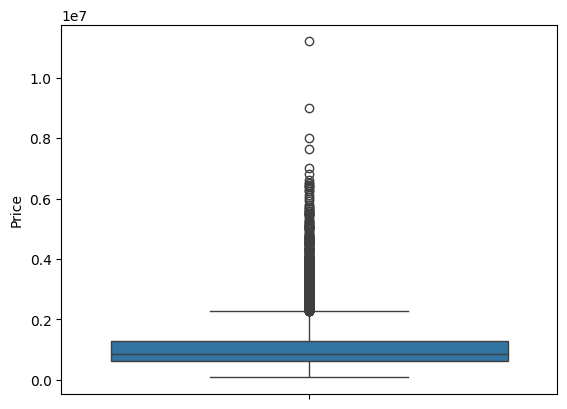

In [79]:
data_series = df['Price']
sns.boxplot(data_series)
outliers = tukeys_test_outliers(data_series)
print(outliers)

In [83]:
df_without_outliers = df.drop(index=outliers.index)

In [84]:
df_without_outliers.shape

(25969, 21)

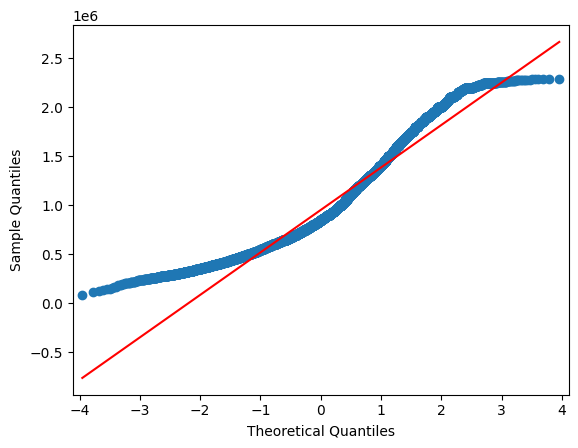

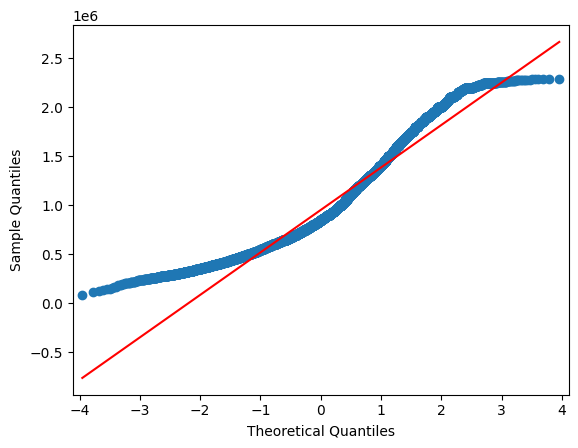

In [85]:
import statsmodels.api as sm
sm.qqplot(df_without_outliers['Price'], line='s')

In [87]:
from scipy import stats
standardized_saleprice = (df_without_outliers['Price'] - df_without_outliers['Price'].mean()) / df_without_outliers['Price'].std()
ks_test_statistic, ks_p_value = stats.kstest(standardized_saleprice, 'norm')

ks_test_statistic, ks_p_value

(np.float64(0.1025878337247823), np.float64(2.1163276086934114e-238))

In [88]:
# print the test result
if ks_p_value < 0.05:
    print('The test results indicate that the distribution of prices is significantly different from a normal distribution.')
else:
    print('The test results indicate that the distribution of prices is not significantly different from a normal distribution.')

The test results indicate that the distribution of prices is significantly different from a normal distribution.


<Axes: xlabel='Type', ylabel='Price'>

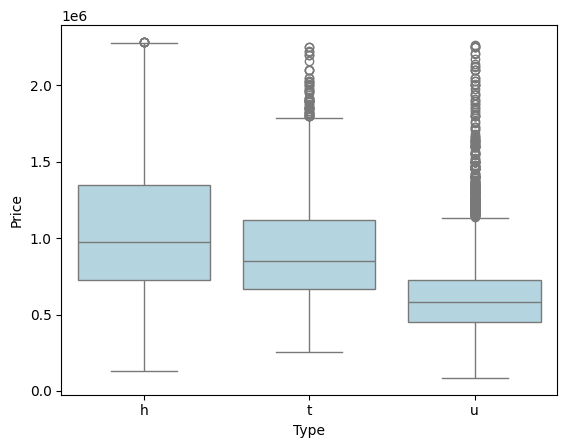

In [95]:
sns.boxplot(data = df_without_outliers, x='Type', y ='Price', color="lightblue")

In [96]:
df.groupby('Regionname').median('Price')

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
Regionname,,,,,,,,,,,,,
Eastern Metropolitan,3.0,1015000.0,14.2,3109.0,3.0,2.0,2.0,662.0,153.0,1970.0,-37.786915,145.135645,5030.0
Eastern Victoria,3.0,679000.0,35.2,3796.0,3.0,2.0,2.0,815.5,160.5,1986.0,-38.022300,145.331430,8280.0
Northern Metropolitan,3.0,752500.0,8.4,3067.0,3.0,1.0,1.0,400.0,118.0,1970.0,-37.737710,144.983940,8870.0
Northern Victoria,3.0,565000.0,31.7,3437.0,3.0,2.0,2.0,735.0,150.0,2000.0,-37.615245,144.826155,4258.0
South-Eastern Metropolitan,3.0,811250.0,22.2,3194.0,3.0,2.0,2.0,617.5,146.0,1975.0,-37.983840,145.135830,6162.0
Southern Metropolitan,3.0,1250000.0,9.2,3163.0,3.0,2.0,2.0,414.0,137.0,1960.0,-37.861265,145.039385,7717.0
Western Metropolitan,3.0,750000.0,9.7,3029.0,3.0,1.0,2.0,488.0,135.0,1975.0,-37.779600,144.874025,5498.0
Western Victoria,3.0,412125.0,29.8,3338.0,3.0,1.0,2.0,603.0,123.0,1975.0,-37.697190,144.573285,4718.0


In [97]:
df_without_outliers.groupby('Regionname').median('Price')

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
Regionname,,,,,,,,,,,,,
Eastern Metropolitan,3.0,1001800.0,14.2,3109.0,3.0,2.0,2.0,658.0,152.0,1970.0,-37.786930,145.136800,5030.0
Eastern Victoria,3.0,675000.0,35.2,3796.0,3.0,2.0,2.0,799.0,160.5,1986.0,-38.023180,145.331300,8280.0
Northern Metropolitan,3.0,750000.0,8.5,3067.0,3.0,1.0,1.0,400.0,118.0,1970.0,-37.736680,144.983780,8870.0
Northern Victoria,3.0,565000.0,31.7,3437.0,3.0,2.0,2.0,735.0,150.0,2000.0,-37.615245,144.826155,4258.0
South-Eastern Metropolitan,3.0,810000.0,22.2,3194.0,3.0,2.0,2.0,616.0,146.0,1975.0,-37.983840,145.136250,6162.0
Southern Metropolitan,3.0,1140000.0,9.2,3165.0,3.0,1.0,2.0,347.0,123.0,1965.0,-37.865210,145.039800,7717.0
Western Metropolitan,3.0,750000.0,9.8,3029.0,3.0,1.0,2.0,484.5,134.0,1975.0,-37.779610,144.873500,5336.0
Western Victoria,3.0,412125.0,29.8,3338.0,3.0,1.0,2.0,603.0,123.0,1975.0,-37.697190,144.573285,4718.0


In [99]:
crosstab_result = pd.crosstab(df['Regionname'], df['Price'])

crosstab_result

Price,85000,112000,121000,131000,145000,160000,170000,185000,190000,200000,...,6400000,6460000,6500000,6600000,6800000,7000000,7650000,8000000,9000000,11200000
Regionname,,,,,,,,,,,,,,,,,,,,,
Eastern Metropolitan,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Eastern Victoria,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Northern Metropolitan,0,0,1,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Northern Victoria,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
South-Eastern Metropolitan,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
Southern Metropolitan,0,1,0,1,0,1,0,0,0,0,...,2,1,1,1,1,1,1,1,0,1
Western Metropolitan,1,0,0,0,1,0,1,2,1,2,...,0,0,0,0,0,0,0,0,0,0
Western Victoria,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [100]:
from scipy.stats import chi2_contingency

# Chi-square test for 'MSZoning' and 'SaleCondition'
chi2_statistic, chi2_p_value, _, _ = chi2_contingency(crosstab_result)

chi2_statistic, chi2_p_value

(np.float64(25658.719637573868), np.float64(1.804092622742568e-144))

In [101]:
from scipy.stats.contingency import association

# Computing the association between variables in 'crosstab_result' using the "cramer" method
association(crosstab_result, method="cramer")

0.3668031316595495

In [106]:
df['Date']= pd.to_datetime(df['Date'], format="%d/%m/%Y")

In [107]:
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month

In [108]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,year,month
1,Abbotsford,85 Turner St,2,h,1480000,S,Biggin,2016-12-03,2.5,3067.0,...,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0,2016,12
2,Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,2016-02-04,2.5,3067.0,...,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0,2016,2
4,Abbotsford,5 Charles St,3,h,1465000,SP,Biggin,2017-03-04,2.5,3067.0,...,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0,2017,3
5,Abbotsford,40 Federation La,3,h,850000,PI,Biggin,2017-03-04,2.5,3067.0,...,94.0,NaN,NaN,Yarra City Council,-37.7969,144.9969,Northern Metropolitan,4019.0,2017,3
6,Abbotsford,55a Park St,4,h,1600000,VB,Nelson,2016-06-04,2.5,3067.0,...,120.0,142.0,2014.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019.0,2016,6


In [112]:
df.groupby('year').median('Price')

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount,month
year,,,,,,,,,,,,,,
2016,3.0,885000.0,9.1,3081.0,3.0,1.0,1.0,332.0,122.0,1965.0,-37.80290,144.99570,6567.0,8.0
2017,3.0,875000.0,11.0,3101.0,3.0,2.0,2.0,548.0,134.0,1970.0,-37.80093,145.00931,6567.0,8.0
2018,3.0,836500.0,12.0,3094.0,3.0,2.0,2.0,577.0,152.0,1975.0,-37.78975,145.01028,6795.0,2.0


In [113]:
df.groupby('month').count()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,year
month,,,,,,,,,,,,,,,,,,,,,
1,649,649,649,649,649,649,649,649,648,648,...,422,276,206,234,648,445,445,648,648,649
2,2067,2067,2067,2067,2067,2067,2067,2067,2067,2067,...,1417,1383,782,851,2067,1492,1492,2067,2067,2067
3,2362,2362,2362,2362,2362,2362,2362,2362,2362,2362,...,1719,1760,818,900,2362,1777,1777,2362,2362,2362
4,1206,1206,1206,1206,1206,1206,1206,1206,1206,1206,...,957,954,507,596,1206,968,968,1206,1206,1206
5,2620,2620,2620,2620,2620,2620,2620,2620,2620,2620,...,2032,2031,1024,1179,2620,2049,2049,2620,2620,2620
6,2425,2425,2425,2425,2425,2425,2425,2425,2425,2425,...,1840,1836,925,1082,2425,1851,1851,2425,2425,2425
7,2359,2359,2359,2359,2359,2359,2359,2359,2359,2359,...,1990,1987,1029,1205,2358,1998,1998,2358,2358,2359
8,2324,2324,2324,2324,2324,2324,2324,2324,2324,2324,...,1928,1551,1051,1217,2324,1972,1972,2324,2324,2324
9,3219,3219,3219,3219,3219,3219,3219,3219,3219,3219,...,2681,1854,1376,1578,3219,2800,2800,3219,3219,3219
